In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 9, 5

In [3]:
dataset = pd.read_csv("mineral_dataset.csv", sep=',', usecols=[0,1,2,4,8,20])
dataset= dataset.dropna()
dataset.head()

,site_name,latitude,longitude,country,commod1,hrock_type
0,Lookout Prospect,55.05612,-132.14344,United States,Copper,Schist
1,Lucky Find Prospect,55.52751,-132.68514,United States,Copper,Diabase
2,Mccullough Prospect,55.97751,-132.99906,United States,Copper,Siltstone
3,Lucky Jim Claim,55.52195,-132.68653,United States,Gold,Granite
4,Matilda Occurrence,55.14556,-132.05233,United States,Gold,Mica Schist


In [4]:
dataset.shape

(64307, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64307 entries, 0 to 304341
Data columns (total 6 columns):
site_name     64307 non-null object
latitude      64307 non-null float64
longitude     64307 non-null float64
country       64307 non-null object
commod1       64307 non-null object
hrock_type    64307 non-null object
dtypes: float64(2), object(4)
memory usage: 3.4+ MB


In [6]:
rocktype_group = dataset.groupby(["hrock_type"], as_index=False)
rocktype_group.ngroups

3011

# SQL

In [7]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///top10_rocktype_v4.db', echo=False)

In [10]:
top_rocktype = dataset.groupby("hrock_type").size().reset_index(name='Size')
# top_rocktype.to_sql('hrock_type', con=engine)

In [11]:
rocktype = {key: int(value) for key, value in
         engine.execute("SELECT hrock_type, Size  FROM hrock_type \
         ORDER BY Size DESC LIMIT 7" ).fetchall()}
rocktype

{'Limestone': 6423,
 'Andesite': 3184,
 'Gravel': 3105,
 'Diorite': 3101,
 'Granite': 2669,
 'Gneiss': 2514,
 'Sandstone': 2321}

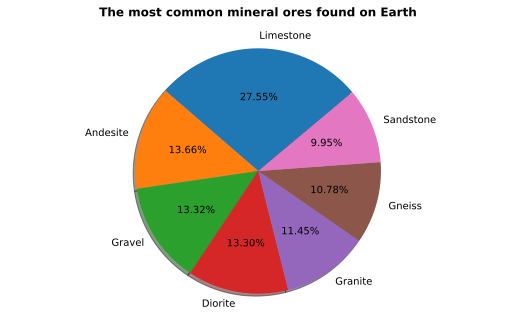

In [12]:
# plot top 7 types of mineral ores
plt.pie(list(rocktype.values()), labels=list(rocktype.keys()), 
        autopct='%1.2f%%', shadow=True, startangle=40);
plt.axis('equal')
plt.title('The most common mineral ores found on Earth', fontsize=12, fontweight='bold',y=1.05);
# plt.savefig('rock_types_global.svg', dpi=430)

In [13]:
rck = ['Limestone','Andesite','Gravel','Diorite']
countries = ["United States","Mexico", "Peru","Chile" ,"Argentina"]
newDF = pd.concat([rocktype_group.get_group(i) for i in rck])

In [14]:
rock_cnt = {i:  {j: newDF[(newDF['country'] == j) & (newDF['hrock_type']== i) ].count()[-1] \
     for j in countries} for i in rck}
[*rock_cnt.values()][0] 

{'United States': 4680,
 'Mexico': 535,
 'Peru': 439,
 'Chile': 127,
 'Argentina': 58}

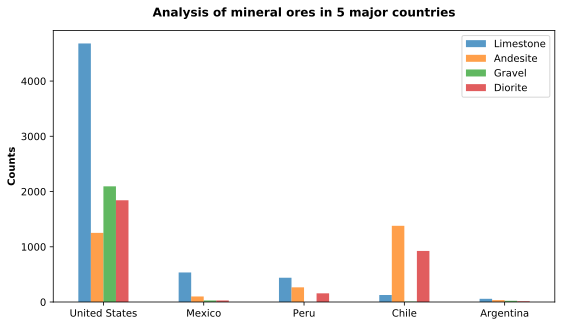

In [15]:
# plot mineral ores for 5 countries
rock_cnt = pd.DataFrame(rock_cnt) # convert dictionary to dataframe 
ax = rock_cnt.plot.bar(alpha=0.75,rot=0,)
plt.title('Analysis of mineral ores in 5 major countries', fontsize=12, fontweight='bold',y=1.03)
plt.ylabel('Counts',fontweight='bold');
# plt.savefig('rock_types_5_countries.svg', dpi=430)

In [17]:
metals = ['Gold', 'Silver']
au_ag = {i:  {j: newDF[(newDF['hrock_type'] == j) & (newDF.commod1.str.contains(i)) ].count()[-2] \
     for j in rck} for i in metals}
au_ag

{'Gold': {'Limestone': 841, 'Andesite': 1191, 'Gravel': 1458, 'Diorite': 1571},
 'Silver': {'Limestone': 1790, 'Andesite': 1015, 'Gravel': 48, 'Diorite': 730}}

Text(0, 0.5, 'Counts')

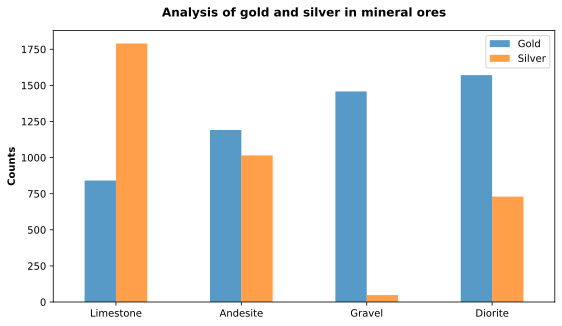

In [18]:
df_au_ag = pd.DataFrame(au_ag) # convert dictionary to dataframe 
ax = df_au_ag.plot.bar(alpha=0.75,rot=0,)
plt.title('Analysis of gold and silver in mineral ores', fontsize=12, fontweight='bold',y=1.03)
plt.ylabel('Counts',fontweight='bold')
# plt.savefig('Analysis of gold and silver in mineral ores.svg', dpi=430);